<a href="https://colab.research.google.com/github/EisaacJC/Uk-CoursesMaterial./blob/main/DeepLearningII_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Celdas de inicialización.

In [1]:
%%capture
!pip install ucimlrepo
!pip install warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Deep Learning II: Optimización de hiperparámetros, regularización y otras técnicas.

Bienvenido a la segunda semana de tu curso de Aprendizaje Profundo II en Universidad UK, a lo largo de esta semana verás el contenido temático correspondiente a los siguientes temas:

	- Regularización L1 y L2.
	- Optimización:
		- Descenso por el gradiente de mini lote.
		- Descenso del gradiente con momento.
		- Mínimos locales y problemas en la optimización.
	- Funciones de activación:
		- Un concepto robado de la física: ensambles termodinámicos.
		- Alternativas a funciones de activación tradicionales.
		- Normalización de la activación.
	- Métodos de inicialización de parámetros:
		- Inicialización de Xavier.
		- Inicialización He.
Esta libreta es la libreta que se usará para las clases a lo largo del curso, puedes verlo como las notas del curso, estarán disponibles para ti al finalizar cada semana y podrás acceder a ellas directamente desde tu Classroom o desde el enlace a Github que te compartiré por el mismo.

Al finalizar la toma de clases semanal tendrás disponible en tu Classroom una actividad que consistirá de los siguientes elementos


	- Actividad 2:
		- Benchmark de un problema de regresión ante regularización L1 y L2.
		- Visualización, implementación y uso de funciones de activación.
		- Inicialización de parámetros en una red neuronal sencilla.

De esta manera y conforme a los lineamientos de la rúbrica que estarán disponibles en tus evaluaciones podrás llevar a cabo la acreditación de tu curso.

Para dudas y aclaraciones contáctate con tu instructor o con tú coach académico.

# Técnicas orientadas a los datos:



*   Regularización de funciones.
    * Ridge
    * LASSO



## LASSO (Least Absolute Shrinkage and Selection Operator, Regularización L1):

LASSO es otra técnica de regresión lineal que incorpora regularización, pero se diferencia de la regresión Ridge en el tipo de término de regularización utilizado. La función objetivo para LASSO se define como:

$$\min_{\beta} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

donde la notación es la misma que en la regresión Ridge, pero el término de regularización es ahora la norma L1 del vector de coeficientes multiplicado por el parámetro de ajuste $\lambda$. La norma L1, $\lambda \sum_{j=1}^{p} |\beta_j|$, tiene la propiedad de forzar algunos de los coeficientes a ser exactamente cero cuando $\lambda$ es suficientemente grande. Esta característica hace que LASSO sea un método atractivo para la selección de variables, ya que puede identificar y excluir de manera efectiva los predictores irrelevantes del modelo. Al establecer algunos coeficientes en cero, LASSO produce modelos dispersos, que pueden ser más interpretables y computacionalmente eficientes que los modelos con todos los predictores incluidos.


## Regresión Ridge (Regularización L2):
La regresión Ridge es una técnica de regresión lineal que introduce un término de regularización a la función objetivo de mínimos cuadrados ordinarios (OLS). El término de regularización es la norma L2 del vector de coeficientes multiplicado por un parámetro de ajuste $\lambda$. La función objetivo para la regresión Ridge se define como:

$$\min_{\beta} \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

donde $y_i$ es la variable de respuesta, $x_{ij}$ son las variables predictoras, $\beta_0$ es el intercepto, $\beta_j$ son los coeficientes, $n$ es el número de observaciones, $p$ es el número de predictores y $\lambda \geq 0$ es el parámetro de ajuste que controla la fuerza de la regularización. El término de regularización $\lambda \sum_{j=1}^{p} \beta_j^2$ reduce los coeficientes hacia cero, pero no los fuerza a ser exactamente cero. Esta propiedad hace que la regresión Ridge sea útil cuando se trata con multicolinealidad, ya que puede reducir el impacto de los predictores correlacionados en la estabilidad e interpretabilidad del modelo.



In [3]:
%%capture
!pip install ISLP

In [4]:
"""Esta práctica está basada en """
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.datasets import fetch_california_housing
from ISLP.models import ModelSpec as MS
from functools import partial

In [5]:
%%capture
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import (Stepwise,sklearn_selected,sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path
scaler = StandardScaler()

In [6]:
cal_housing =  fetch_california_housing()
X = cal_housing.data
Y = cal_housing.target

In [7]:
X_train, X_test, Y_train, Y_test = skm.train_test_split(X, Y,
                                                        test_size=0.2,
                                                        random_state=0)

###Regresión Ridge

In [8]:
lambdas = 10**np.linspace(4, -4, 100)
ridgeCV = skl.RidgeCV(alphas=lambdas, cv=5, store_cv_values=True)
ridge_scores = []
for alpha in lambdas:
    ridge = skl.Ridge(alpha=alpha)
    pipe = Pipeline(steps=[('scaler', scaler),
                           ('ridge', ridge)])
    scores = skm.cross_validate(pipe, X_train, Y_train, cv=5,
                                scoring='neg_mean_squared_error',
                                return_train_score=True)
    ridge_scores.append((-scores['test_score'].mean(),
                         scores['test_score'].std(),
                         -scores['train_score'].mean(),
                         scores['train_score'].std()))

ridge_scores = np.array(ridge_scores)

best_idx = np.argmin(ridge_scores, axis=0)[0]
best_lambda = lambdas[best_idx]
best_score = -ridge_scores[best_idx, 0]

print(f"Best lambda for ridge: {best_lambda:.3f}")
print(f"Test MSE for tuned ridge model: {best_score:.3f}")


Best lambda for ridge: 14.850
Test MSE for tuned ridge model: -0.528


### LASSO

In [9]:
lassoCV = skl.LassoCV(n_alphas=100, cv=5)
pipe = Pipeline(steps=[('scaler', scaler),
                       ('lasso', lassoCV)])
pipe.fit(X_train, Y_train)

tuned_lasso = pipe.named_steps['lasso']
print(f"\nBest lambda for lasso: {tuned_lasso.alpha_:.3f}")
print(f"Test MSE for tuned lasso model: {np.mean((tuned_lasso.predict(X_test) - Y_test)**2):.3f}")
print(f"Number of non-zero coefficients: {np.sum(tuned_lasso.coef_ != 0)}")



Best lambda for lasso: 0.002
Test MSE for tuned lasso model: 4610.934
Number of non-zero coefficients: 8


Text(0.5, 1.0, 'Lasso regression')

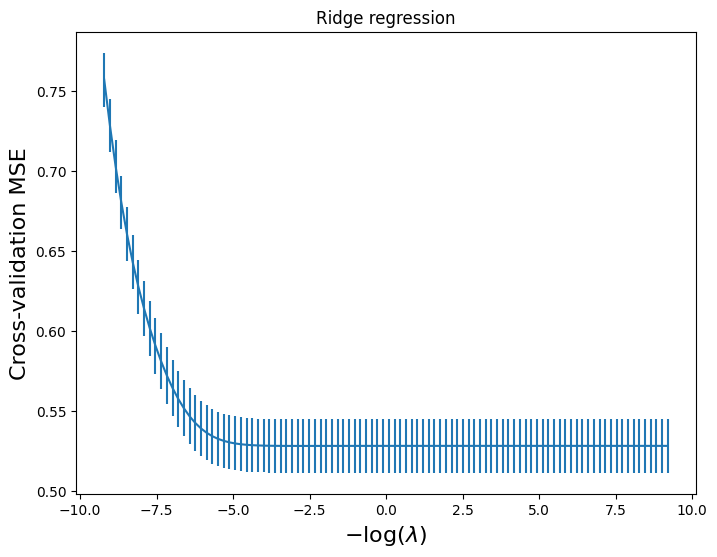

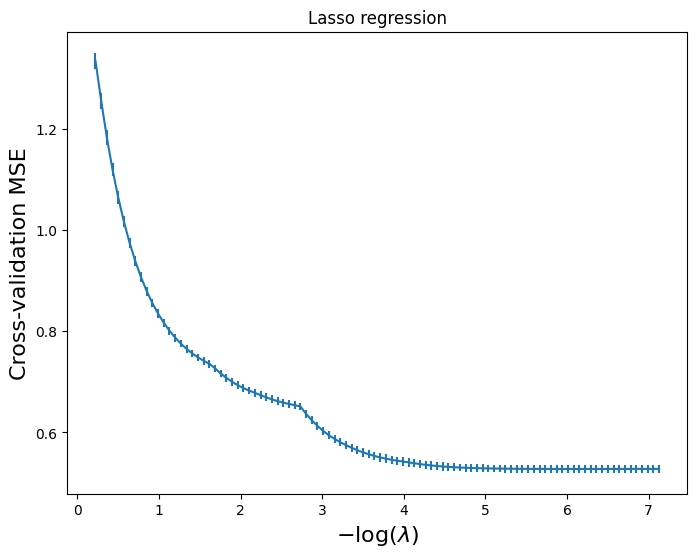

In [10]:
ridge_fig, ax = subplots(figsize=(8,6))
ax.errorbar(-np.log(lambdas), ridge_scores[:, 0], yerr=ridge_scores[:, 1])
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=16)
ax.set_ylabel('Cross-validation MSE', fontsize=16)
ax.set_title("Ridge regression")


lasso_fig, ax = subplots(figsize=(8,6))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            np.mean(tuned_lasso.mse_path_, axis=1),
            yerr=np.std(tuned_lasso.mse_path_, axis=1) / np.sqrt(5))
ax.set_xlabel(r'$-\log(\lambda)$', fontsize=16)
ax.set_ylabel('Cross-validation MSE', fontsize=16)
ax.set_title("Lasso regression")

## Usando L1 y L2 en una NN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lambdas = [10**i for i in range(-5,2)]

In [ ]:
models = {
    'l1': [],
    'l2': [],
    'none': []
}
scores = {
    'l1': [],
    'l2': [],
    'none': []
}



In [ ]:
for reg_type in ['l1', 'l2', 'none']:
    for lam in lambdas:
        model = Sequential([
            Dense(64, activation='relu', kernel_regularizer=l1(lam) if reg_type == 'l1' else l2(lam) if reg_type == 'l2' else None, input_shape=(X_train.shape[1],)),
            Dense(32, activation='relu', kernel_regularizer=l1(lam) if reg_type == 'l1' else l2(lam) if reg_type == 'l2' else None),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(X_train_scaled, Y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
        score = model.evaluate(X_test_scaled, Y_test, verbose=0)
        models[reg_type].append(model)
        scores[reg_type].append(score)

In [ ]:
best_scores = {}
best_lambdas = {}
for reg_type in ['l1', 'l2', 'none']:
    best_index = np.argmin(scores[reg_type])
    best_scores[reg_type] = scores[reg_type][best_index]
    best_lambdas[reg_type] = lambdas[best_index] if reg_type != 'none' else None


In [13]:
for reg_type in ['l1', 'l2', 'none']:
    if reg_type in best_scores and reg_type in best_lambdas:
        print(f"Best {reg_type} regularization:")
        print(f"  Lambda: {best_lambdas[reg_type]}")
        print(f"  Test MSE: {best_scores[reg_type]:.3f}")
    else:
        print(f"No results found for {reg_type} regularization.")

Best l1 regularization:
  Lambda: 0.01
  Test MSE: 0.430
Best l2 regularization:
  Lambda: 0.01
  Test MSE: 0.335
Best none regularization:
  Lambda: None
  Test MSE: 0.280


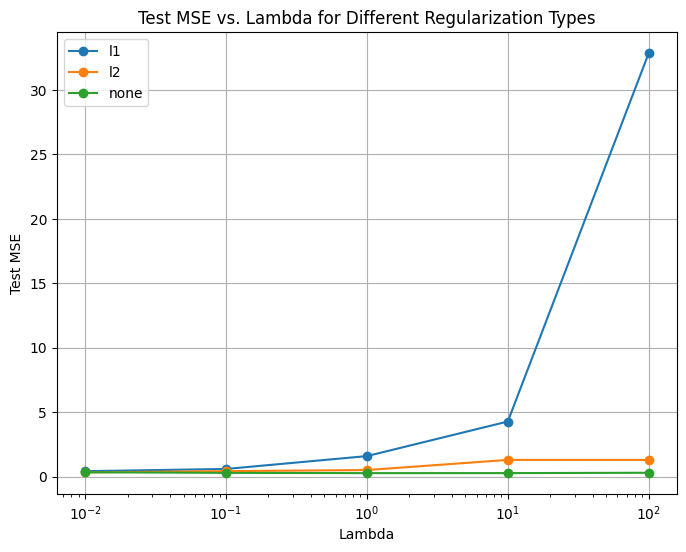

In [14]:
plt.figure(figsize=(8, 6))
for reg_type in ['l1', 'l2', 'none']:
    plt.plot(lambdas, scores[reg_type], marker='o', label=reg_type)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Test MSE vs. Lambda for Different Regularization Types')
plt.legend()
plt.grid(True)
plt.show()

## Optimización (Tiempo estimado para el aprendizaje 3-4 horas)

### ¿Por qué optimizar funciones?

Uno de los mayores problemas que tiene el humano es llevar a cabo optimización, la idea de optimizar consiste en elegir un

### ¿Qué es la optimización?

La optimización es una rama de las matemáticas que se dedica a estudiar el comportamiento de las funciones, en particular, se encarga de estudiar los valores que hacen que una función sea extrema, es decir, tenga valores máximos y mínimos.



Formalmente un problema de optimización se define como aquel tal que

\begin{eqnarray}
\text{minimize } \{f_1(\vec{x}),f_2(\vec{x}),\cdots,f_k(\vec{x})\}\\
\text{sujeta a } \vec{x} \in S
\end{eqnarray}

Donde $\vec{x}=(x_1,x_2,\cdots,x_n)$ es conocida como la variable de decisión los cuales pertenecen a una región factible no vacía $S \in \mathbb{R}^n$

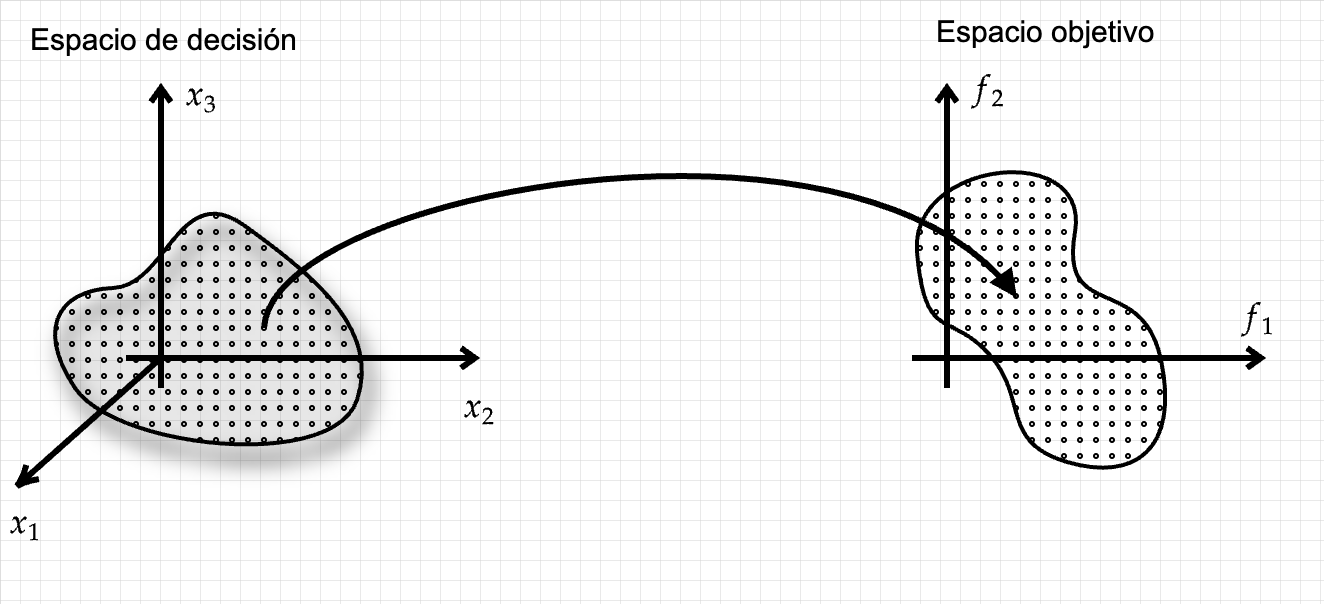

El problema general de la optimización de varias funciones simultáneas es un problema que se estudia en un área que se conoce como **optimización multiobjetivo**, usualmente las funciones además de tener limitaciones de dominio propio tienden a tener restricciones de dominio _inducidas_ o añadidas.

Las constricciones o restricciones de dominio pueden ser en general cualquier tipo de funciones que restrinjan el espacio de de las funciones objetivo.

Un caso importante e interesante de estudio es el caso de una variable, en este caso la optimización se hace sobre una función, supongamos:
$$y=f(x),$$ además supongamos que no existen restricciones de dominio.

En el caso de una variable y con una función continua y derivable se puede hallar los valores extremos de un intervalo calculando la primera derivada e igualandola a cero:

$$f'(x)=0$$

A los valores $x$ en donde se tiene que $f'(x)=0$ se les conoce como valores críticos.

Los valores críticos pueden ser o no puntos óptimos, para evaluar el comportamiento de una función en este sentido hace falta considerar la segunda derivada de la misma.

El criterio de la segunda derivada consiste en calcular propiamente $f''(x)=0$:
1. Si $f^{\prime \prime}(x) < 0$, entonces $f$ tiene un máximo relativo en $(x, f(x))$.
2. Si $f^{\prime \prime}(x)>0$, entonces $f$ tiene un mínimo relativo en $(x, f(x))$.
3. Si $f^{\prime \prime}(x)=0$, entonces el criterio no decide.


Esto es, $f$ quizás tenga un máximo relativo en $x$, un mínimo relativo en $(x, f(x))$ o ninguno de los dos. En tales casos, se puede utilizar el criterio de la primera derivada o el criterio de la tercera derivada.




> (Criterio de la segunda derivada, https://es.wikipedia.org/w/index.php?title=Criterio_de_la_segunda_derivada&oldid=141103722 (consultado por última vez enero 21, 2022).

)


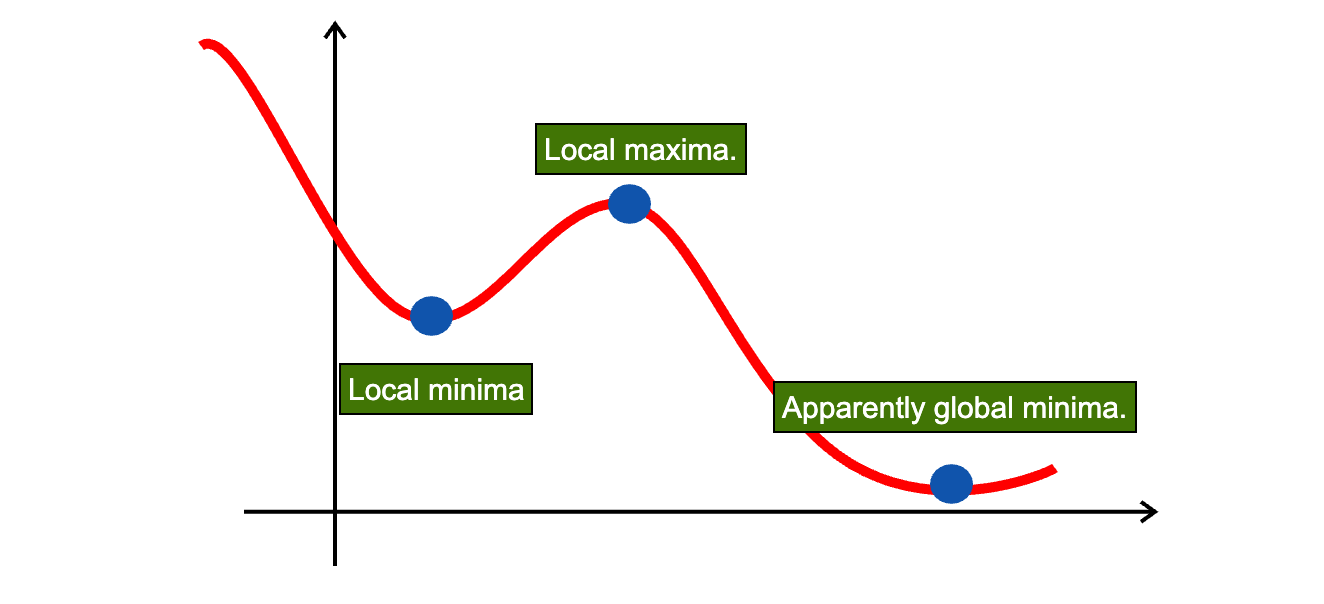

Existen generalizaciones directas al caso con más dimensiones.

En el caso de varias variables el criterio de la primera derivada se transforma directamente según:

$$\vec{\nabla}f(x_1,x_2,x_2,\cdots,x_n)=\vec{0}$$



En esta notación consideramos:


1.   El gradiente ( $\vec{\nabla}$ ) está definido, es decir, todas las derivadas parciales existen.
2.   El resultado es un vector, es decir, se tiene que cada una de las derivadas parciales:
$$\frac{\partial}{\partial x_i} f(x_1,x_2,\cdots,x_n)=0$$
3. El gradiente de una función escalar apunta en la dirección de máximo crecimiento.
4. El negativo del gradiente de una función por otro lado apunta en la dirección de máximo descenso o mínimo creciente.



Para que una función tenga un máximo global o un mínimo global esta debe de ser estrictamente convexa.

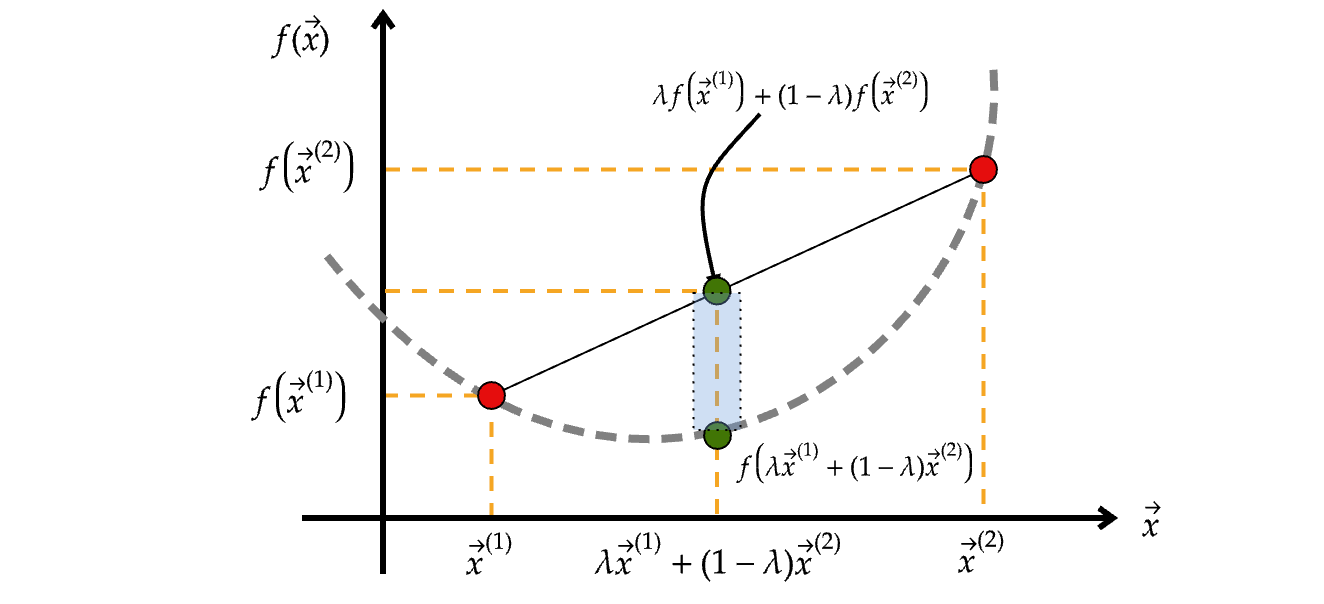

En el caso específico de una función objetivo o de una única función por optimizar el mínimo o máximo global se determina como único, sin embargo, en el caso de más funciones objetivo el criterio de optimización se extiende a un conjunto de soluciones óptimas.

El conjunto de soluciones óptimas de una colección de funciones objetivo se conoce como frente de Pareto y si bien será algo que abordaremos de manera estrictamente teórica es importante conocer algunas de sus propiedades.

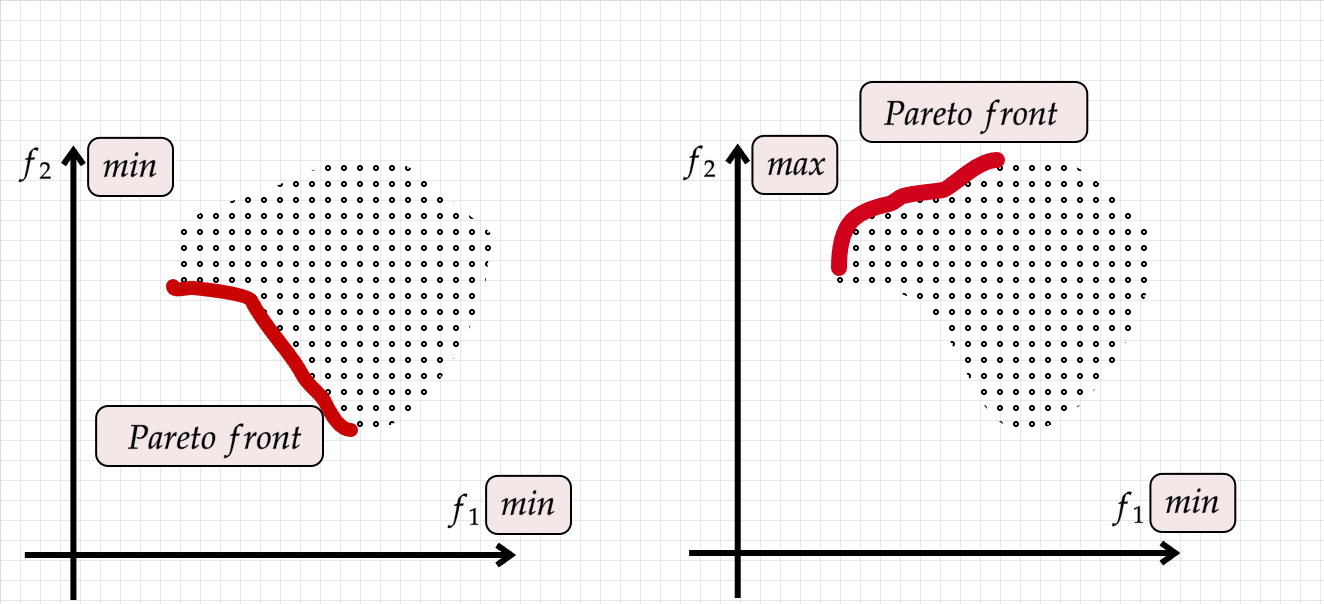

Para más información al respecto de los métodos clásicos y su interpretación geométrica se te recomienda visualizar la playlist de requisitos previos del curso, que consta de una sección de cálculo multivariado, en la misma se pueden encontrar explicaciones breves y simples con ejemplos algebraicos:


[Requisitos previos del curso](https://youtube.com/playlist?list=PLS56I7mWp4ljEIbsTRawHmyvcB77_egrP&si=RJgem1Ud6ZPLuQ6h)

De igual manera esta referencia te permitirá llevar a cabo el descubrimiento de algoritmos usados en problemas de optimización específicos del área.

[Ruoyu Sun, "Optimization for deep learning: theory and algorithms"](https://arxiv.org/pdf/1912.08957.pdf)

A lo largo de este curso asumiremos que los conceptos previos han sido entendidos y nos dedicaremos explicitamente a entender los algoritmos:



*   SGD (Descenso por el gradiente estocástico) con momento.
*   RMSprop.
*   Adam.




## Un breve repaso del descenso por el gradiente.

Consideremos una función escalar, es decir, una función que satisfaga un mapeo de la forma $f:\mathbb{R}^n\to\mathbb{R}$, y consideremos un punto $\vec{p}=(x_1,x_2,\cdots,x_n)$, en este caso el gradiente de la función estaría dado por:
$$\vec{\nabla}f(x_1,x_2,\cdots,x_n)=\frac{\partial }{\partial x_i}f(x_1,x_2,\cdots,x_n) \hat{e}_i$$



Recordemos que por las condiciones discutidas previamente buscamos el valor de $\vec{p}$ tal que el gradiente evaluado en ese punto sea cero, es decir:

$$\vec{\nabla}f(\vec{p})=0$$

En este caso $\vec{p}$ será un punto inicial, sin embargo, no se espera que el primer punto satisfaga esta condición, es por esto que en general trataremos de encontrar un punto siguiente tal que en ese caso el gradiente satisfaga la condición.

Podemos llevar a cabo el etiquetado de los puntos de la forma $\vec{p}_n$, lo que queremos es que justamente el gradiente evaluado en ese valor sea cero, o al menos cercano a cero:
$$\vec{\nabla}f(\vec{p}_n)\approx 0$$

¿Qué condiciones se deben de dar para que esto se satisfaga?

Dado que es un proceso iterativo es natural proponer una métrica de error de la forma:

$$\vec{p}_{n+1}-\vec{p}_n$$

En el caso 1-dimensional:

$$\varepsilon=p_{n+1}-p_n$$


En este caso ya hemos definido nuestra primera condición, la cual consiste en que la distancia entre los dos puntos sea pequeña, pero, ¿qué tan pequeña? quisieramos que fuera cercana a cero, no obstante, notemos algo muy importante, otra de nuestras propuestas es que justamente nuestro gradiente de la función evaluada en el punto sea cercana a cero, de esta manera podemos proponer:

\begin{eqnarray}
& \varepsilon &  \alpha & (\pm) \nabla f(p_n)
\end{eqnarray}
En donde $\alpha$ representa una relación de proporcionalidad y el signo $(\pm)$ caracteriza al problema (-) para el problema de minimización (+) para el problema de maximización.

Para caracterizar propiamente el descenso por el gradiente debemos entonces ajustar esa proporcionalidad y hacerla una igualdad, esto mediante la introducción de una constante, misma que tendrá un nombre especial y servirá como hiperparámetro $\gamma$, a este hiperparámetro se le conoce como tasa de aprendizaje.

Así podemos escribir:
$$p_{n+1}=p_n-\gamma \nabla f(p_n)$$

### Implementación naive del descenso por el gradiente:

In [15]:
def SGD(x, y, theta, gamma, maxiter):
    """
    El descenso por el gradiente estocástico tendrá dos condiciones de "parada"
    1. Llegamos al valor adecuado (el error es cero, es decir p_{n+1}=p_n)
    2. Llegamos al máximo de iteraciones (esto es útil porque hay casos en donde
    el algoritmo no llegará a la solución óptima nunca o en todo caso tardará más
    de lo que tenemos previsto)
    """
    for i in range(maxiter):
        h=np.dot(x,theta)
        #Se le conoce como hipotesis, básicamente es una consideración para
        #proyectar las soluciones sobre las variables
        error=h-y
        grad=np.dot(x.T,error)/len(y)
        theta=theta-gamma*grad #Descenso por el gradiente
    return theta

##¿Qué pasa con el descenso por el gradiente?
Como hemos discutido este algoritmo tiene limitantes importantes, en particular la búsqueda de un óptimo está determinada por un hiperparámetro, con esto en consideración configurar el modelo es algo que puede tornarse complicado:



1.   Valores más pequeños del learning rate (γ) tienden a dar mejores resultados en el proceso de optimización, sin embargo, esta elección hace que las ejecuciones sean más lentas y tiende a estancarse en mínimos locales.
2.   Valores más grandes del learning rate (γ) tienden a dar resultados menos precisos pero en ocasiones puede hacer que se estudie una región mayor del espacio, esto es particularmente útil para salir de mínimos locales.

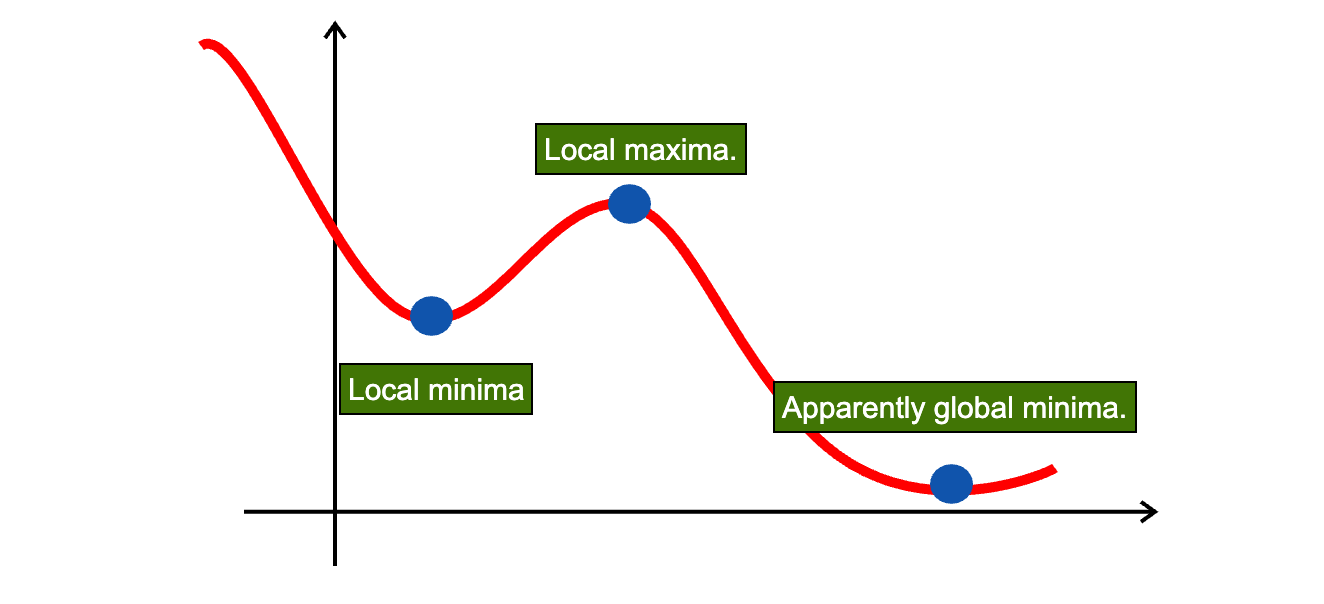

## Aspectos a considerar acerca del algoritmo mostrado.

Este si bien no es un SGD en el sentido estricto, pues no actualiza los parámetros usando un subconjunto aleatrorio de los datos en cada iteración.

## Descenso por el gradiente con batch

Esta es una alternativa directa al descenso por el gradiente, la modificación sobre el algoritmo original es simple, en este caso se busca que en cada iteración se lleve un muestreo aleatorio de los datos y en base a estos lleva a cabo el cálculo del siguiente punto de la iteración.

### Ventajas del descenso con batch.


1.   Puede implementarse con cómputo en paralelo.
2.   En términos de la optimización permite explorar más el espacio de búsqueda, sobre todo, permite salir con más facilidad de los mínimos locales, sin embargo, esta sigue siendo una de sus áreas de oportunidad.



In [16]:
def SGD_batch(x, y, theta, alpha, num_iters, batch_size):
    for i in range(num_iters):
        """
        La única variación respecto al algoritmo original es que ahora se toman
        índices aleatorios y
        """
        indices = np.random.choice(len(y), batch_size, replace=False)
        x_batch = x[indices]
        y_batch = y[indices]
        h = np.dot(x_batch, theta)
        error = h - y_batch
        gradient = np.dot(x_batch.T, error) / batch_size
        theta -= alpha * gradient

    return theta

## Descenso por el gradiente con momento (Gradient Descent with Momentum)

- Incorpora un término de momento al actualizar los parámetros.
- Actualización de los parámetros:
  - $ v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta_t) $
  - $ \theta_{t+1} = \theta_t - \alpha v_t $
- $\beta$: factor de momento.
- $\gamma$: tasa de aprendizaje.

En resumen, el descenso por el gradiente con momento agrega un término de "momento" que acumula las direcciones anteriores del gradiente, acelerando la convergencia hacia el mínimo global y reduciendo oscilaciones.


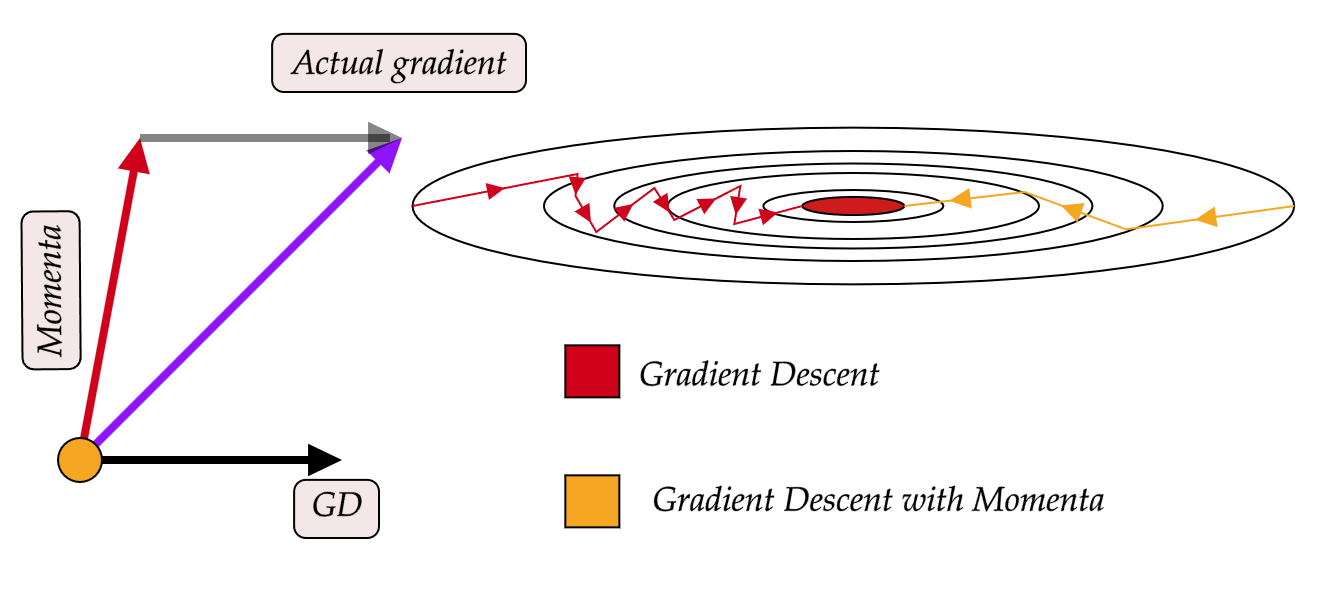

In [17]:
def gradient_descent_with_momentum(x, y, theta, alpha, beta, num_iters):
    velocity = np.zeros_like(theta)
    for i in range(num_iters):
        h = np.dot(x, theta)
        error = h - y
        gradient = np.dot(x.T, error)/len(y)
        velocity = beta * velocity + alpha * gradient
        theta =theta-velocity
    return theta

## RMSprop (Root Mean Square Propagation):

- Adaptively ajusta la tasa de aprendizaje para cada parámetro.
- Actualización de los parámetros:
  - $ v_t = \beta v_{t-1} + (1 - \beta) (\nabla J(\theta_t))^2 $
  - $ \theta_{t+1} = \theta_t - \alpha \frac{\nabla J(\theta_t)}{\sqrt{v_t} + \epsilon} $
- $\beta$: factor de decaimiento.
- $\alpha$: tasa de aprendizaje.
- $\epsilon$: pequeño valor para evitar división por cero.

In [18]:
def rmsprop(x, y, theta, alpha, beta, epsilon, num_iters):
    v = np.zeros_like(theta)
    for i in range(num_iters):
        h = np.dot(x, theta)
        error = h - y
        gradient = np.dot(x.T,error)/len(y)
        v = beta*v +(1-beta)*(gradient** 2)
        theta = alpha-alpha*gradient/(np.sqrt(v) + epsilon)
    return theta

## Adam (Adaptive Moment Estimation):

- Combina los conceptos de momento y RMSProp.
- Actualización de los parámetros:
  - $ m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla J(\theta_t) $
  - $ v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla J(\theta_t))^2 $
  - $ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $
  - $ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $
  - $ \theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $
- $\beta_1$: factor de decaimiento para el momento.
- $\beta_2$: factor de decaimiento para la magnitud del gradiente.
- $\alpha$: tasa de aprendizaje.
- $\epsilon$: pequeño valor para evitar división por cero.

In [19]:
def adam(x, y, theta, alpha, beta1, beta2, epsilon, num_iters):
    v = np.zeros_like(theta)
    s = np.zeros_like(theta)
    v_hat = np.zeros_like(theta)
    s_hat = np.zeros_like(theta)
    for i in range(1, num_iters + 1):
        h = np.dot(x, theta)
        error = h - y
        gradient = np.dot(x.T,error)/len(y)
        v = beta1*v+(1-beta1)*gradient
        s = beta2*s+(1-beta2)*(gradient**2)
        v_hat = v/ (1-beta1**i)
        s_hat = s/(1-beta2**i)
        theta =alpha-alpha*v_hat/(np.sqrt(s_hat)+epsilon)
    return theta

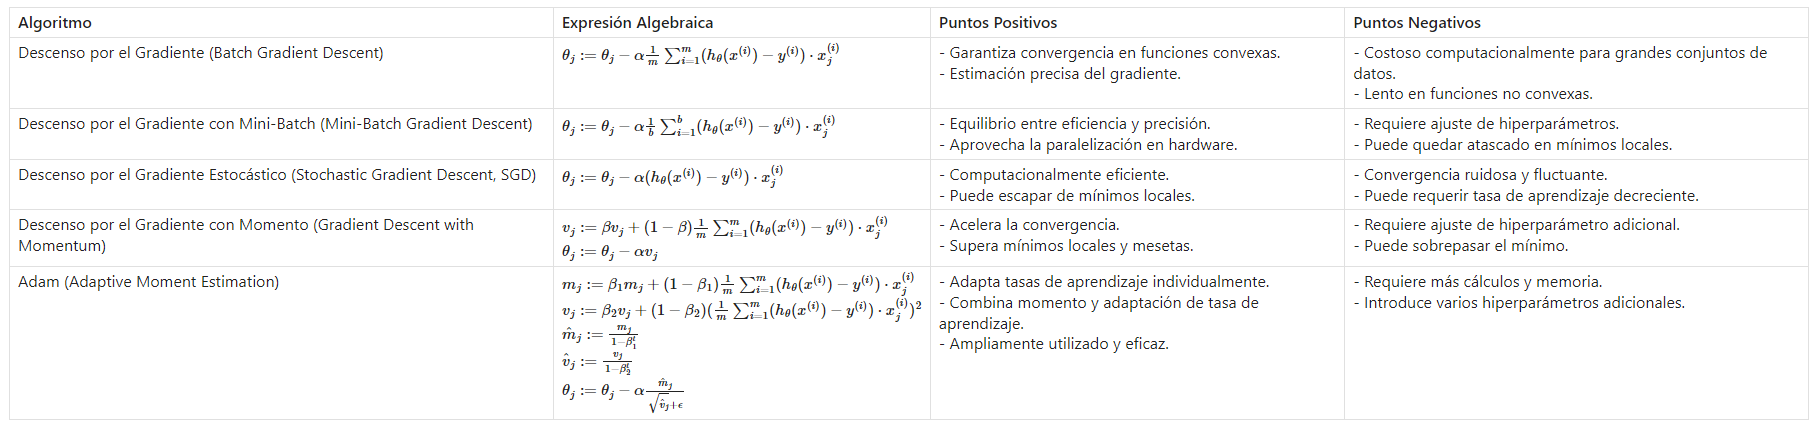

# Funciones de activación.

Las funciones de activación son elementos cruciales en el Aprendizaje Profundo, su función es modular el comportamiento de las redes neuronales, pues estas modelan el comportamiento de la sinápsis que está presente en el modelo biológico del cerebro.

El uso de las funciones de activación es relevante en el proceso de aprendizaje, se ha probado que el uso de determinadas funciones puede ayudar a que el modelo de IA usado aprenda de manera más efectiva e incluso con menor cantidad de ejemplos.

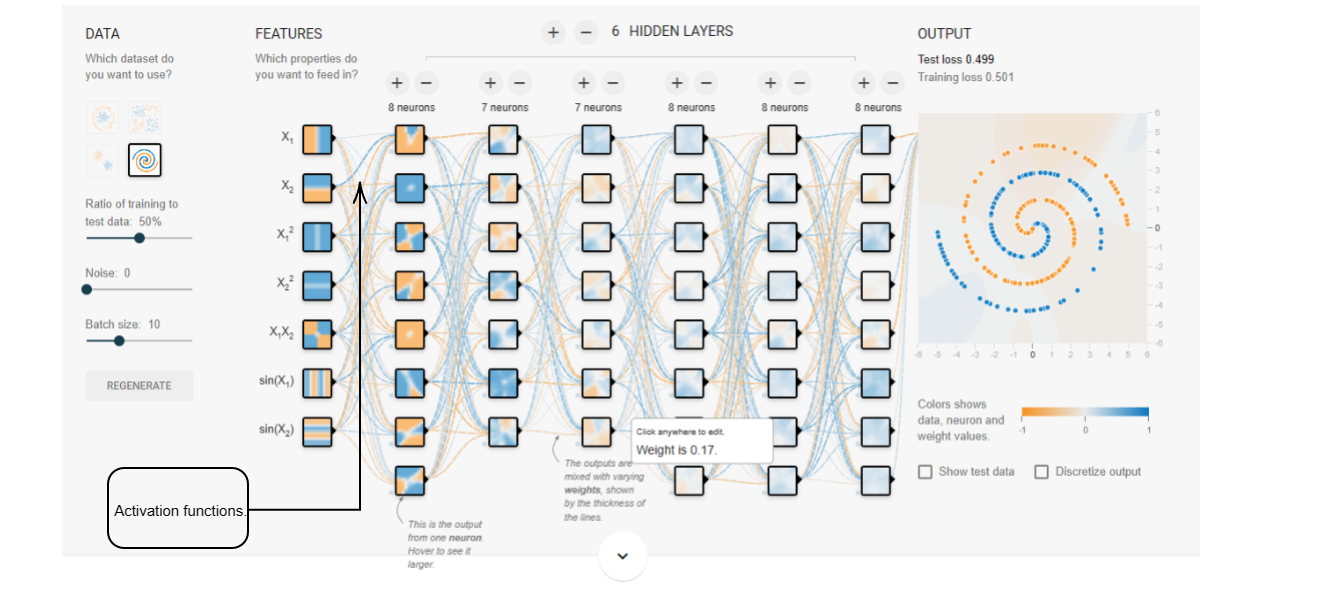

Existen diversas funciones de activación uutilizadas en el Deep Learning, su uso se ve reflejado por ejemplo en:

* Función sigmoide: su uso  está relacionado con las capas ocultas de las redes neuronales en problemas de clasificación binaria.
* ReLU: está principalmente relacionada con el uso en CNN pues tiene la capacidad de evitar el problema del desvanecimiento del gradiente y acelera el entrenamiento,
* Softmax: es la generalización multidimensional de la función sigmoide, entre otras cosas permite extender

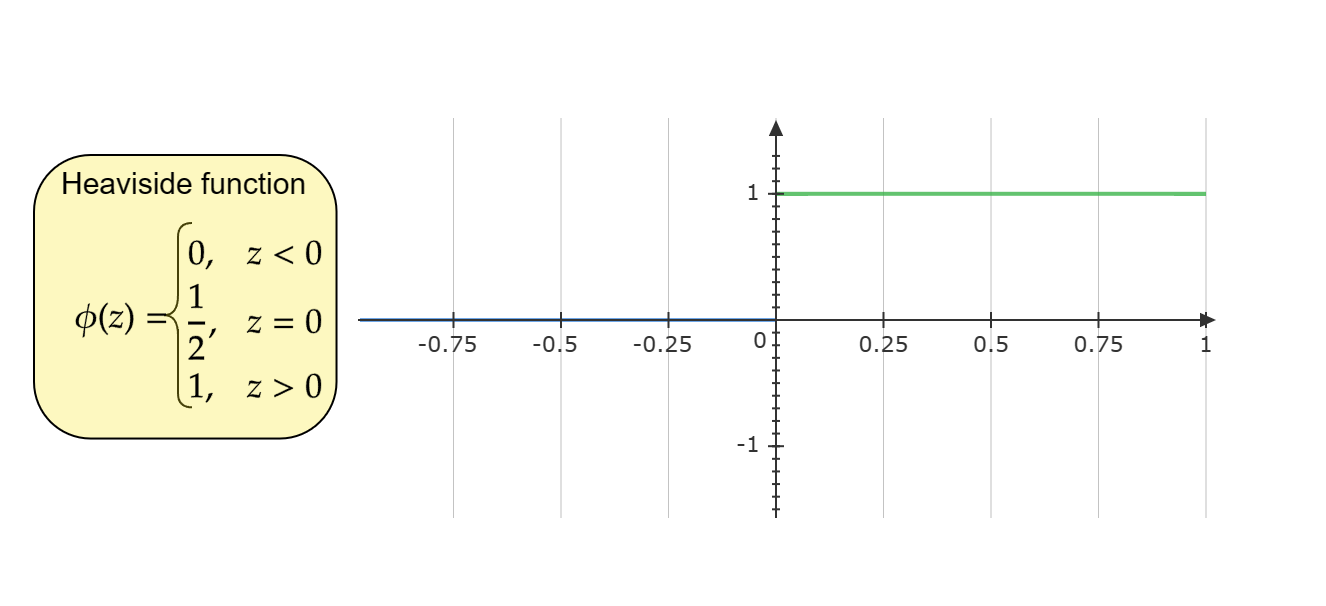

Heaviside (función de paso):

Utilidad:

    - Mapea la entrada a un valor binario (0 o 1) dependiendo de si es mayor o igual a cero.
    - Se utiliza a menudo en problemas de - clasificación binaria.
    - Simple y fácil de interpretar.
Limitaciones:

    - No diferenciable en el punto de corte, lo que dificulta el entrenamiento con métodos de optimización basados en gradiente.

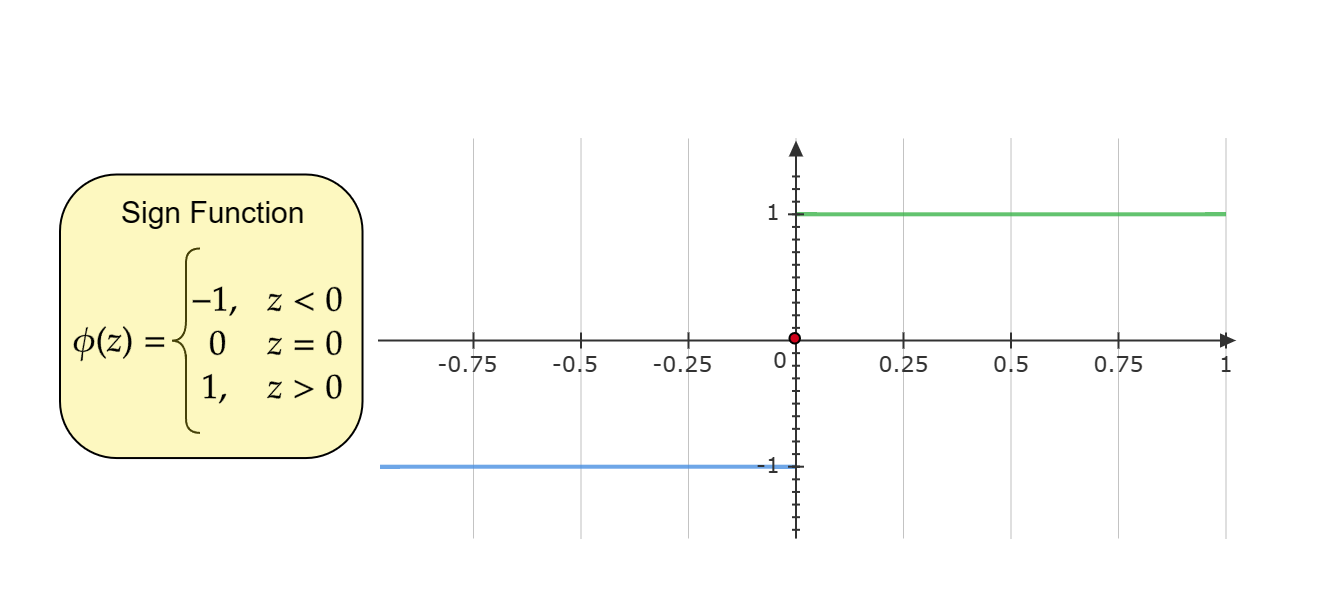

Utilidad:

    - Mapea la entrada a -1, 0 o 1 dependiendo de si es negativa, cero o positiva, respectivamente.
    - Útil en problemas de clasificación binaria y perceptrones.

Limitaciones:

    - No diferenciable en el punto de corte (0), lo que dificulta el entrenamiento con métodos de optimización basados en gradiente.

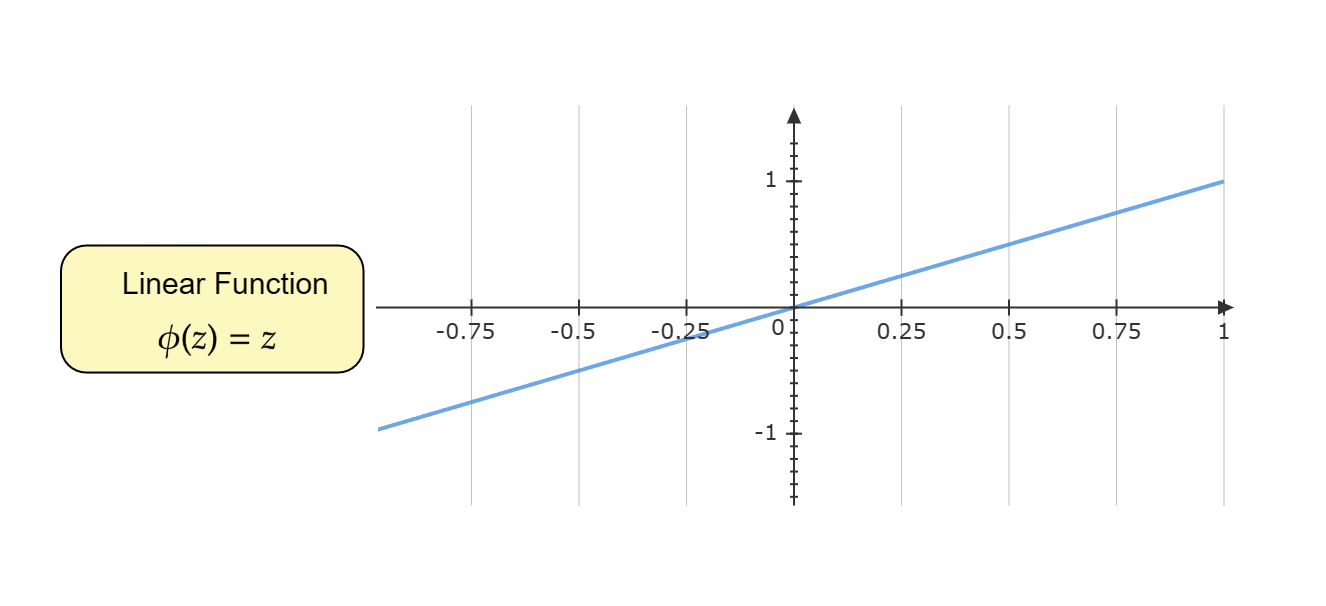

Utilidad:

    - Produce una salida proporcional a la entrada.

    - A menudo se utiliza en problemas de regresión lineal y como capa de salida en modelos de regresión.
    
    - Mantener la linealidad en algunas capas de una red neuronal puede ayudar a mantener la interpretabilidad del modelo.
Limitaciones:

    - No puede capturar relaciones no lineales en los datos.

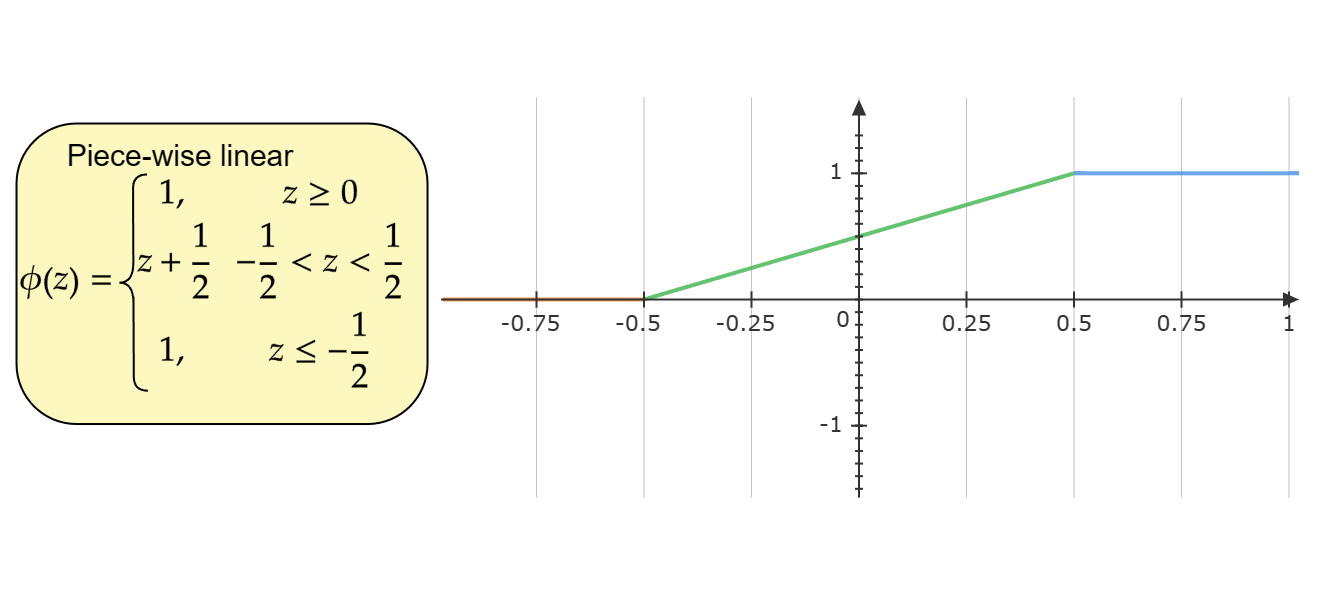

Utilidad:
    
    - Divide el rango de entrada en segmentos lineales, permitiendo capturar no linealidades locales en los datos.
    
    - A menudo se utiliza en arquitecturas de redes neuronales como ReLU (Rectified Linear Unit) y variantes.
    
    - Puede ayudar a mitigar el problema de la desaparición del gradiente en comparación con las funciones lineales simples.
Limitaciones:
    
    - No es suave en el punto de corte, lo que puede conducir a problemas de estabilidad en el entrenamiento.

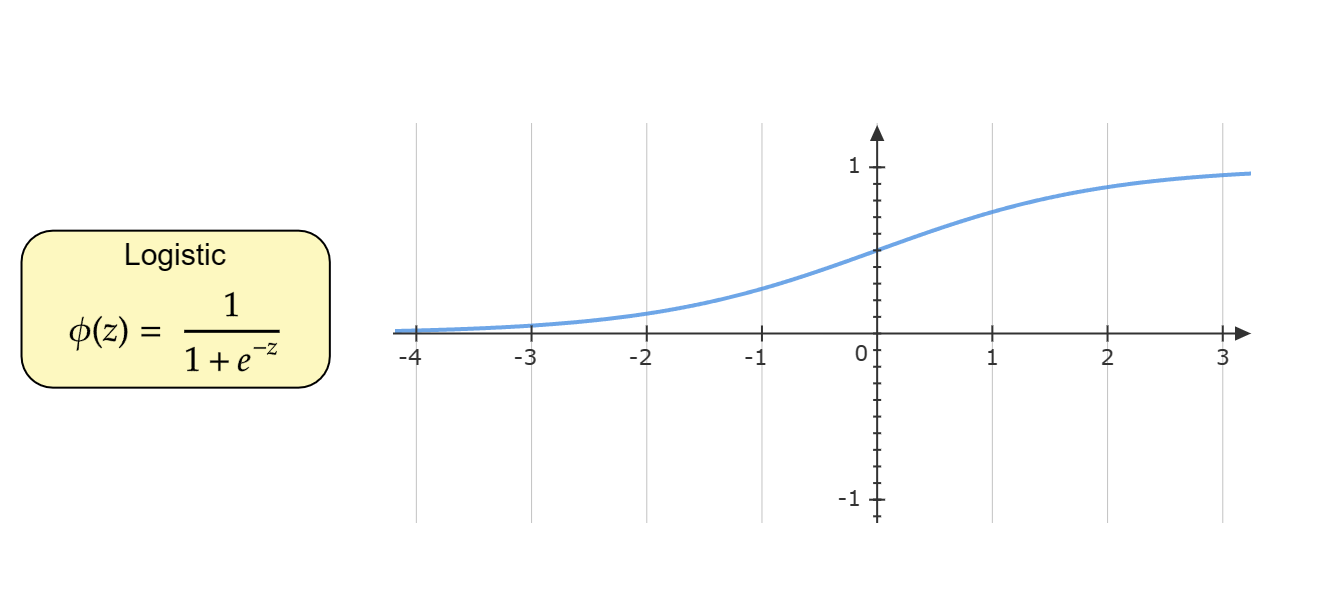

Utilidad:

    - Mapea la entrada a un rango de 0 a 1, lo que la hace adecuada para problemas de clasificación binaria.
    
    - Produce una salida suave y diferenciable en todo el rango de valores de entrada.
    
    - Se utiliza en redes neuronales para modelar la probabilidad de que una instancia pertenezca a una clase en problemas de clasificación binaria.
Limitaciones:
    
    - La función logística puede saturarse para valores muy grandes o muy pequeños de entrada, lo que puede dificultar el entrenamiento en algunas circunstancias.

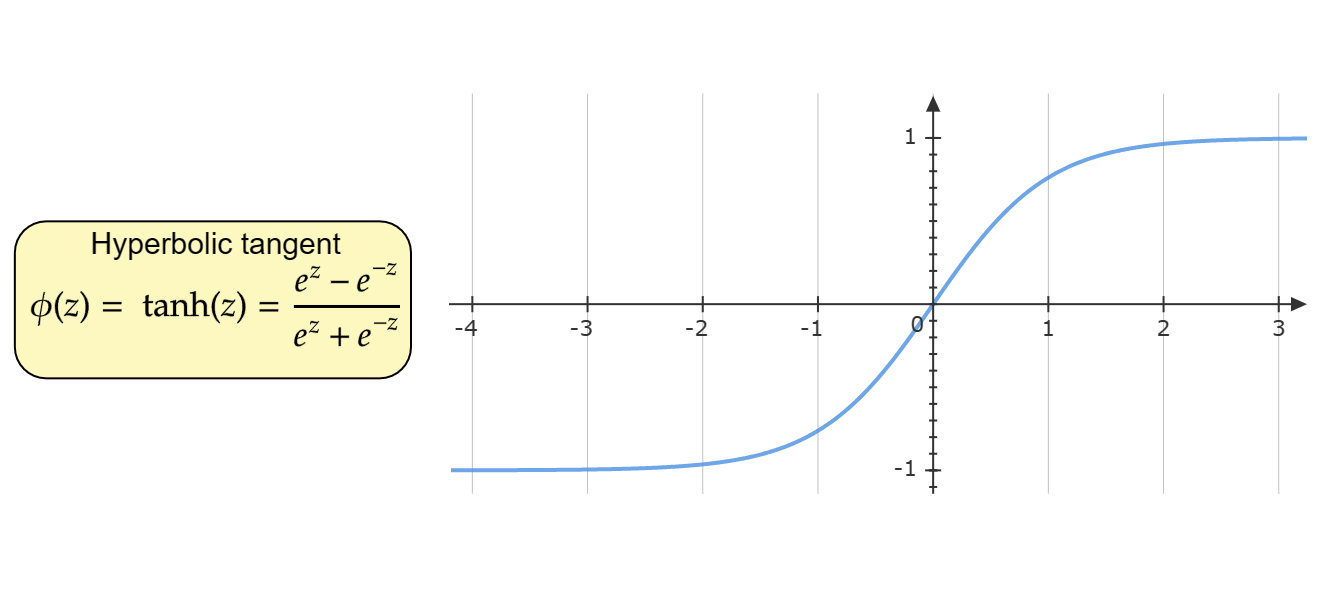

Utilidad:

    - Mapea la entrada a un rango de -1 a 1, lo que la hace útil para problemas de clasificación y regresión.

    - Similar a la función logística, pero con un rango que incluye valores negativos, lo que la hace más adecuada para problemas centrados en cero.

    - Produce una salida suave y diferenciable en todo el rango de valores de entrada.

Limitaciones:

    - Puede sufrir de saturación en los extremos, lo que puede afectar el entrenamiento si las entradas son muy grandes o muy pequeñas.

# Inicialización de parámetros.

Uno de los elementos cruciales en el diseño e implementación de una red neuronal es la inicialización de parámetros de aprendizaje, puesta puede tener un impacto sginificativo en el rendimiento y la convergencia del modelo de IA.

Los parámetros que usualmente son inicializados son los pesos y sesgos de las neuronas, mismas que se inicializan antes del entrenamiento, por consecuente la elección adecuada es sumamente importante, pues puede ayudar como se comentó previamente a hallar mejores resultados.

Una técnica común consiste en inicializar los pesos y el sesgo como valores aleatorios, esto permite que el algoritmo aprenda desde cero, sin embargo, por la misma razón el aprendizaje puede tornarse extremadamente lento.



### Warm Start

Otra opción es que el aprendizaje comience con valores previamente aprendidos, en lugar de hacer una inicialización aleatoria. Esto puede tornarse beneficioso en los casos en donde el algoritmo actuará en un conjunto de datos similar o en su caso, cuando se desea continuar el entrenamiento desde algún punto de control.

## Inicialización de Xavier

La inicialización de Xavier Glorot y Yoshua Bengio es un método que fue propuesto en 2010  (https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) y que triene como objetico mantener la carianza en las activaciones y actualización del gradiente en las capas de la ANN.

El uso de este método de activación se basa en el número de neuronas de entrada y de salida de capa, para las capas con una función de activación lineal usa una distribución uniforme o normal para asignarle valor a los pesos.

Para aquellas que tienen funciones como la sigmoidal o tangente hiperbólica, en ese caso se usa una distribución notmal con una varianza específica.


## Inicialización He

Esta inicialización es comunmente usada en las tareas de clasificación y segmentación semántica de imágenes, como ventajas es que preserva la no linealidad de las funciones com la función ReLU, este tipo de inicialización puede reducir o maginificar la magnitud de las entradas. (véase: https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf)

## Inicialización de Yann LeCun
La inicialización de Yann LeCun tiene el objetivo de preveer la explosión de los gradientes durante el proceso de retropropagación mediante el crecimiento de la varianza con el número de entradas y la configuración de una varianza constante de la forma $\frac{1}{n}$ donde n es el número de entradas de la capa. Es utilizada en las CNN (Convolutional Neural Networks) y su uso es particularmente importante en arquitecturas como LeNet.

## Otros métodos de inicialización.

A continuación se enlista una serie de contenido acerca de otras posibles metodologías de inicialización, si bien estas son usadas en distintos ambitos, comunmente se prefiere alguna de las discutidas anteriormente:



1.   Inicialización Ortogonal: en este método se inicializan los pesos de manera que las matrices de pesos sean ortogonales, esto es usado pues ayuda a preservar la norma de los gradientes y las activaciones durante el entrenamiento. Un método de implementación es hacer uso de SVD en la matriz de pesos inicial aleatoria.(https://arxiv.org/pdf/2001.05992.pdf)

2.   Inicialización basada en normalización:
    *  Batch normalization.  (https://arxiv.org/pdf/1502.03167.pdf)
    *  Layer Normalization.(https://arxiv.org/pdf/1607.06450.pdf)


Además en este artículo podrás encontrar información adicional para llevar a cabo implementaciones y sobre todo entender el funcionamiento de los algoritmos:
https://arxiv.org/pdf/1704.08863.pdf

## Práctica de inicialización de parámetros.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Epoch 1/10
313/313 [==============================] - 6s 16ms/step - loss: 1.8988 - accuracy: 0.3090 - val_loss: 1.7575 - val_accuracy: 0.3666
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 1.7232 - accuracy: 0.3842 - val_loss: 1.7460 - val_accuracy: 0.3743
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 1.6560 - accuracy: 0.4069 - val_loss: 1.6289 - val_accuracy: 0.4126
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5981 - accuracy: 0.4296 - val_loss: 1.5852 - val_accuracy: 0.4296
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 1.5578 - accuracy: 0.4463 - val_loss: 1.6357 - val_accuracy: 0.4081
Epoch 6/10
313/313 [==============================] - 4s 14ms/step - loss: 1.5349 - accuracy: 0.4534 - val_loss: 1.5451 - val_accuracy: 0.4440
Epoch 7/10
313/313 [==============================] - 4s 12ms/step - loss: 1.5056 - accuracy: 0.4647 - val_loss: 1.5623 - val_accuracy: 0.4428

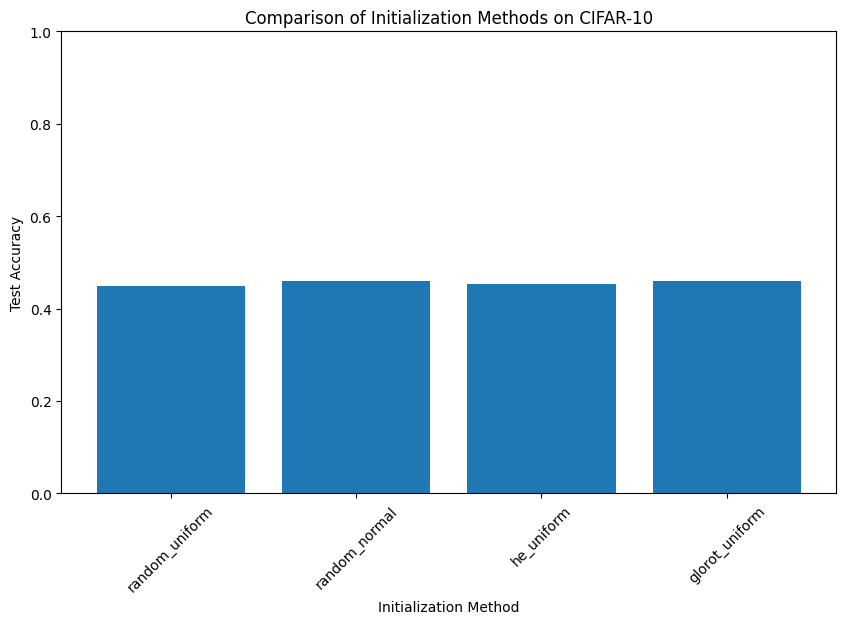

In [45]:
init_methods = ['random_uniform', 'random_normal', 'he_uniform', 'glorot_uniform']
accuracies = []
for init_method in init_methods:
    """
    Aquí creamos un modelo extremadamente sencillo de una red neuronal, es importante
    notar que por consecuente esperamos que el valor de precisión no sea el más adecuado
    es por esto que debemos de procurar modificaciones.
    """
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu', kernel_initializer=init_method),
        Dense(64, activation='relu', kernel_initializer=init_method),
        Dense(10, activation='softmax')
    ])
    """
    En este caso los hiperparámetros también se pueden mover, no es necesario dejarlos
    fijos, intenta modificarlos y ver el papel de los mismos.
    """
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, y_val))
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(test_accuracy)
    print(f"Initialization: {init_method}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(init_methods, accuracies)
plt.xlabel('Initialization Method')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Initialization Methods on CIFAR-10')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

## Arquitecturas más complicadas

Como pudiste ver el uso de estas arquitecturas nos comprometió altamante, pues en este caso la simplicidad dio como resultado valores que no son para nada buenos, dado que cIFAR-10 es un conjunto de datos de imágenes, podemos usar dos arquitecturas particularmente útiles para la clasificación de imágenes, estas se verán a detalle en tu curso de visión por computadora y visión por computadora avanzada.

    * Resnet-18 (véase: https://pytorch.org/hub/pytorch_vision_resnet/)
    * AlexNet (véase https://pytorch.org/hub/pytorch_vision_alexnet/)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Add, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
"""
Estas arquitecturas fueron tomadas directamente de  Resnet-18 (véase: https://pytorch.org/hub/pytorch_vision_resnet/)
"""
def resnet_block(inputs, num_filters, kernel_initializer='he_normal', kernel_size=3, strides=1, activation='relu'):
    x = Conv2D(num_filters, kernel_size=kernel_size, strides=strides, padding='same', kernel_initializer=kernel_initializer)(inputs)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation)(x)
    x = Conv2D(num_filters, kernel_size=kernel_size, strides=1, padding='same', kernel_initializer=kernel_initializer)(x)
    x = BatchNormalization()(x)
    if strides != 1:
        shortcut = Conv2D(num_filters, kernel_size=1, strides=strides, kernel_initializer=kernel_initializer)(inputs)
        shortcut = BatchNormalization()(shortcut)
        x = Add()([x, shortcut])
    else:
        x = Add()([x, inputs])
    x = tf.keras.layers.Activation(activation)(x)
    return x
"""
Para más información de cómo se plantearon se sugiere acudir al artículo original, sin embargo
eso supera los alcances de este curso.
"""
def resnet18(input_shape, num_classes, kernel_initializer='he_normal'):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer)(inputs)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = resnet_block(x, num_filters=64, strides=1, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=64, strides=1, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=128, strides=2, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=128, strides=1, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=256, strides=2, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=256, strides=1, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=512, strides=2, kernel_initializer=kernel_initializer)
    x = resnet_block(x, num_filters=512, strides=1, kernel_initializer=kernel_initializer)
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    return model

In [8]:

"""
Estas arquitecturas fueron tomadas directamente de AlexNet (véase https://pytorch.org/hub/pytorch_vision_alexnet/)
"""
def alexnet(input_shape, num_classes, kernel_initializer='he_normal'):
    model = Sequential([
        Conv2D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape, kernel_initializer=kernel_initializer),
        MaxPooling2D(pool_size=3, strides=2),
        BatchNormalization(),

        Conv2D(256, kernel_size=5, strides=1, activation='relu', padding="same", kernel_initializer=kernel_initializer),
        MaxPooling2D(pool_size=3, strides=2),
        BatchNormalization(),

        Conv2D(384, kernel_size=3, strides=1, activation='relu', padding="same", kernel_initializer=kernel_initializer),
        Conv2D(384, kernel_size=3, strides=1, activation='relu', padding="same", kernel_initializer=kernel_initializer),
        Conv2D(256, kernel_size=3, strides=1, activation='relu', padding="same", kernel_initializer=kernel_initializer),
        MaxPooling2D(pool_size=3, strides=2),
        BatchNormalization(),

        Flatten(),
        Dense(4096, activation='relu', kernel_initializer=kernel_initializer),
        Dropout(0.5),
        Dense(4096, activation='relu', kernel_initializer=kernel_initializer),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [9]:
input_shape = (32, 32, 3)
num_classes = 10
batch_size = 128
epochs = 20

In [11]:
init_methods = ['he_uniform', 'glorot_uniform', 'he_normal', 'glorot_normal']


In [ ]:
resnet18_accuracies = []
for init_method in init_methods:
    with tf.device('/GPU:0'):  # Especificar el dispositivo GPU
        resnet18_model = resnet18(input_shape, num_classes, kernel_initializer=init_method)
        resnet18_model.compile(optimizer=Adam(learning_rate=0.001),
                               loss='categorical_crossentropy',
                               metrics=['accuracy'])
        resnet18_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))
        _, resnet18_accuracy = resnet18_model.evaluate(X_test, y_test, verbose=0)
        resnet18_accuracies.append(resnet18_accuracy)
        print(f"ResNet-18 - Initialization: {init_method}, Test Accuracy: {resnet18_accuracy:.4f}")


Epoch 1/20
313/313 [==============================] - 64s 136ms/step - loss: 1.2997 - accuracy: 0.5316 - val_loss: 1.2508 - val_accuracy: 0.5596
Epoch 2/20
313/313 [==============================] - 38s 122ms/step - loss: 0.7948 - accuracy: 0.7203 - val_loss: 1.4192 - val_accuracy: 0.5768
Epoch 3/20
 45/313 [===>..........................] - ETA: 30s - loss: 0.5938 - accuracy: 0.7934

In [ ]:
alexnet_accuracies = []
for init_method in init_methods:
    with tf.device('/GPU:0'):  # Especificar el dispositivo GPU
        alexnet_model = alexnet(input_shape, num_classes, kernel_initializer=init_method)
        alexnet_model.compile(optimizer=Adam(learning_rate=0.001),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])
        alexnet_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))
        _, alexnet_accuracy = alexnet_model.evaluate(X_test, y_test, verbose=0)
        alexnet_accuracies.append(alexnet_accuracy)
        print(f"AlexNet - Initialization: {init_method}, Test Accuracy: {alexnet_accuracy:.4f}")


In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(init_methods, resnet18_accuracies)
plt.xlabel('Initialization Method')
plt.ylabel('Test Accuracy')
plt.title('ResNet-18 - Initialization Methods Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(init_methods, alexnet_accuracies)
plt.xlabel('Initialization Method')
plt.ylabel('Test Accuracy')
plt.title('AlexNet - Initialization Methods Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Referencias de interés científico/técnico:

1. Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.
https://www.deeplearningbook.org/

2. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf


TensorFlow/Keras:

1. Creación y entrenamiento de modelos de redes neuronales
2. Documentación oficial: Sequential model: https://www.tensorflow.org/guide/keras/sequential_model
3. Guía de inicio rápido: Beginner quickstart: https://www.tensorflow.org/tutorials/quickstart/beginner



## Artículos y aplicaciones de posible interés:

* Demo de las arquitecturas comentadas.
https://huggingface.co/spaces/pytorch/ResNet
https://huggingface.co/spaces/pytorch/AlexNet

* Visualizaciones de las redes neuronales:
https://playground.tensorflow.org/